## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

#### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flights_sample = pd.read_csv("../../data/processed/flights_sample.csv", index_col=None)

### Some Feature Engineering:

# Change the column dtypes to the correct type for the date columns
flights_sample['Scheduled Departure Time (local time)'] = pd.to_datetime(flights_sample['Scheduled Departure Time (local time)'])
flights_sample['Actual Departure Time (local time)'] = pd.to_datetime(flights_sample['Actual Departure Time (local time)'])
flights_sample['Wheels Off (local time)'] = pd.to_datetime(flights_sample['Wheels Off (local time)'])
flights_sample['Wheels On (local time)'] = pd.to_datetime(flights_sample['Wheels On (local time)'])
flights_sample['Scheduled Arrival Time (local time)'] = pd.to_datetime(flights_sample['Scheduled Arrival Time (local time)'])
flights_sample['Actual Arrival Time (local time)'] = pd.to_datetime(flights_sample['Actual Arrival Time (local time)'])

#Create a new column for the hour of the day for actual departure time and for wheels on time
flights_sample['Actual Departure Hour'] = flights_sample['Actual Departure Time (local time)'].dt.hour  #I don't like that they are FLOATS.. would prefer int but having an error code because of NANs
flights_sample['Wheels On Hour'] = flights_sample['Wheels On (local time)'].dt.hour #I don't like that they are FLOATS.. would prefer int but having an error code because of NANs

# Create a new column that calculates the difference between the departure delay and arrival delay
flights_sample['Difference in Delay (Dep - Arr [minutes])'] = flights_sample['Departure Delay (minutes)'] - flights_sample['Arrival Delay (minutes)']

#Create departure and arrival state column
flights_sample['Departure State'] = flights_sample['Origin Airport (City, State)'].str[-2:]
flights_sample['Arrival State'] = flights_sample['Destination Airport (City, State)'].str[-2:]

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [3]:
flights_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199350 entries, 0 to 199349
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Flight Year                                 199350 non-null  int64         
 1   Flight Month                                199350 non-null  int64         
 2   Flight Day                                  199350 non-null  int64         
 3   Flight Weekday                              199350 non-null  int64         
 4   Marketer - Unique Carrier Code              199350 non-null  object        
 5   Operator - Unique Carrier Code              199350 non-null  object        
 6   Different Marketer & Operator Carrier Code  199350 non-null  int64         
 7   Tail Number                                 199350 non-null  object        
 8   Flight Number                               199350 non-null  int64        

In [4]:
#Notes:
#all cancelled flights have zeroes in all delay columns
#all early flights (negative value in 'Arrival Delay (minutes) have zeroes in all other delay columns. ')


#Cancelled Flights - look at only flights with canvelled == 1
    # cancelled_flights = flights_sample[flights_sample['Cancelled'] == 1]
    # cancelled_flights = cancelled_flights[['Cancelled','Arrival Delay (minutes)','Carrier Delay (minutes)','Weather Delay (minutes)','National Air System Delay (minutes)','Security Delay (minutes)','Late Aircraft Delay (minutes)']]
    # cancelled_flights.head()

#Early Flights - look at only flights with arrival delay > 0
    # early_flights = flights_sample[flights_sample['Arrival Delay (minutes)'] < 0]
    # early_flights = early_flights[['Arrival Delay (minutes)','Carrier Delay (minutes)','Weather Delay (minutes)','National Air System Delay (minutes)','Security Delay (minutes)','Late Aircraft Delay (minutes)']]
    # early_flights.head()
    
#Late Flights - look at only flights with arrival delay > 0
    # late_flights = flights_sample[flights_sample['Arrival Delay (minutes)'] > 0]
    # late_flights = late_flights[['Departure Delay (minutes)','Arrival Delay (minutes)','Carrier Delay (minutes)','Weather Delay (minutes)','National Air System Delay (minutes)','Security Delay (minutes)','Late Aircraft Delay (minutes)']]
    # late_flights.head(10)
    

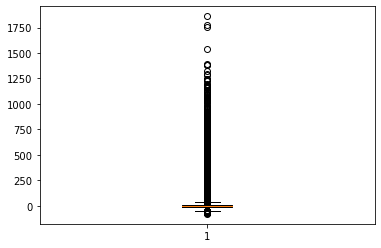

In [5]:
#Create box plot of arrival delay to check if outliers exist
fig, ax = plt.subplots()
ax.boxplot(flights_sample['Arrival Delay (minutes)'])
plt.show()

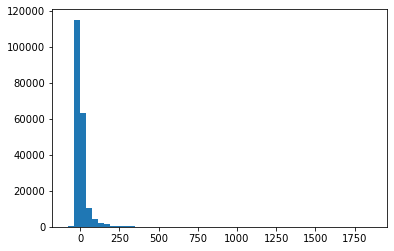

In [6]:
#Create histogram to visually gauge whether distribution may be normal
fig, ax = plt.subplots()
ax.hist(flights_sample['Arrival Delay (minutes)'], bins=50)
plt.show()

In [7]:
#Clearly outliers exist. 
#Remove values which are greater than 3 standard deviations from the mean
mean = flights_sample['Arrival Delay (minutes)'].mean()
std = flights_sample['Arrival Delay (minutes)'].std()
cut_off = std * 3
print(mean)
print(std)
print(cut_off)

5.251196388261851
49.15193762378564
147.45581287135693


In [8]:
#Create upper and lower bounds for cut-off (less than and greater than 3 standard deviations from the mean)
lower_bound = mean - cut_off
upper_bound = mean + cut_off
print(lower_bound)
print(upper_bound)

-142.20461648309507
152.7070092596188


In [9]:
flights_sample_no_outliers = flights_sample[(flights_sample['Arrival Delay (minutes)'] < upper_bound) & (flights_sample['Arrival Delay (minutes)'] > lower_bound)]
arr_delays_no_outliers = flights_sample_no_outliers['Arrival Delay (minutes)']
arr_delays_no_outliers.describe()

count    196015.000000
mean          0.801587
std          27.644628
min         -80.000000
25%         -15.000000
50%          -6.000000
75%           6.000000
max         152.000000
Name: Arrival Delay (minutes), dtype: float64

In [10]:
#Check the % of data that was removed by removing outliers
(flights_sample.shape[0] - flights_sample_no_outliers.shape[0]) / flights_sample.shape[0] * 100

1.672937045397542

In [11]:
#Removed < 2% of the data - ok. 

#Remove all cancelled flights from the dataset - these provide misleading information about lateness. 
flights_sample_no_outliers_no_cancelled = flights_sample_no_outliers[flights_sample_no_outliers['Cancelled'] == 0]
flights_sample_no_outliers_no_cancelled.head()

#Remove all diverted flights from the dataset - these provide misleading information about lateness. 
flights_sample_no_outliers_no_cancelled_no_diverted = flights_sample_no_outliers_no_cancelled[flights_sample_no_outliers_no_cancelled['Cancelled'] == 0]
flights_sample_no_outliers_no_cancelled_no_diverted.head()

,Flight Year,Flight Month,Flight Day,Flight Weekday,Marketer - Unique Carrier Code,Operator - Unique Carrier Code,Different Marketer & Operator Carrier Code,Tail Number,Flight Number,Origin Airport (ID),...,Carrier Delay (minutes),Weather Delay (minutes),National Air System Delay (minutes),Security Delay (minutes),Late Aircraft Delay (minutes),Actual Departure Hour,Wheels On Hour,Difference in Delay (Dep - Arr [minutes]),Departure State,Arrival State
0,2019,4,28,6,AA,AA,0,N914AN,2859,12889,...,0,0,0,0,0,16.0,1.0,10,NV,IL
1,2019,12,21,5,AA,AA,0,N764US,2934,15096,...,0,0,0,0,0,18.0,22.0,21,NY,NC
2,2018,10,22,0,WN,WN,0,N550WN,2320,11540,...,0,0,0,0,0,17.0,21.0,5,TX,TX
3,2018,11,17,5,WN,WN,0,N8319F,612,11292,...,0,0,20,0,8,17.0,2.0,-20,CO,SC
4,2018,12,6,3,DL,DL,0,N672DL,1797,10397,...,0,0,0,0,0,9.0,11.0,12,GA,FL


In [12]:
#Check total % of data removed by removing outliers, canelled, diverted
(flights_sample.shape[0] - flights_sample_no_outliers_no_cancelled_no_diverted.shape[0]) / flights_sample.shape[0] * 100

3.053925257085528

In [13]:
# 3% - ok. Use this sample for calculations. 
flights_analysis = flights_sample_no_outliers_no_cancelled_no_diverted

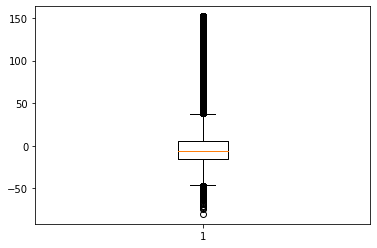

In [14]:
#Create box plot with no outliers
fig, ax = plt.subplots()
ax.boxplot(flights_analysis['Arrival Delay (minutes)'])
plt.show()

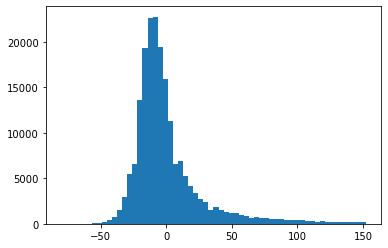

In [15]:
#Check histogram with no outliers
fig, ax = plt.subplots()
ax.hist(flights_analysis['Arrival Delay (minutes)'], bins = 60)
plt.show()

In [16]:
#perform Kolmogorov-Smirnov test (cannot use Shaprio-Wilks because > 5000 points)

from scipy.stats import kstest

kstest(flights_analysis['Arrival Delay (minutes)'], 'norm')

KstestResult(statistic=0.5981013546348014, pvalue=0.0)

In [17]:
# p-value < 0.05 meaning it is NOT normally distributed

#Take sample of 5000 values to try Shapiro-Wilks test. 
delays_5000 = flights_analysis['Arrival Delay (minutes)'].sample(n=5000)

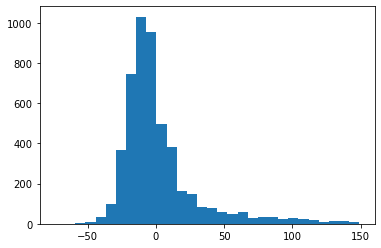

In [18]:
#Check histogram with no outliers
fig, ax = plt.subplots()
ax.hist(delays_5000, bins = 30)
plt.show()

In [19]:
#Perform Shapiro-Wilks test to see if normal
#Import Shapiro-Wilks test from Shapiro

from scipy.stats import shapiro
sh_test = delays_5000
stat, p = shapiro(sh_test)
if p > 0.05:
    print("The distribution is Gaussian")
else:
    print("The distribution is not Gaussian")

The distribution is not Gaussian


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

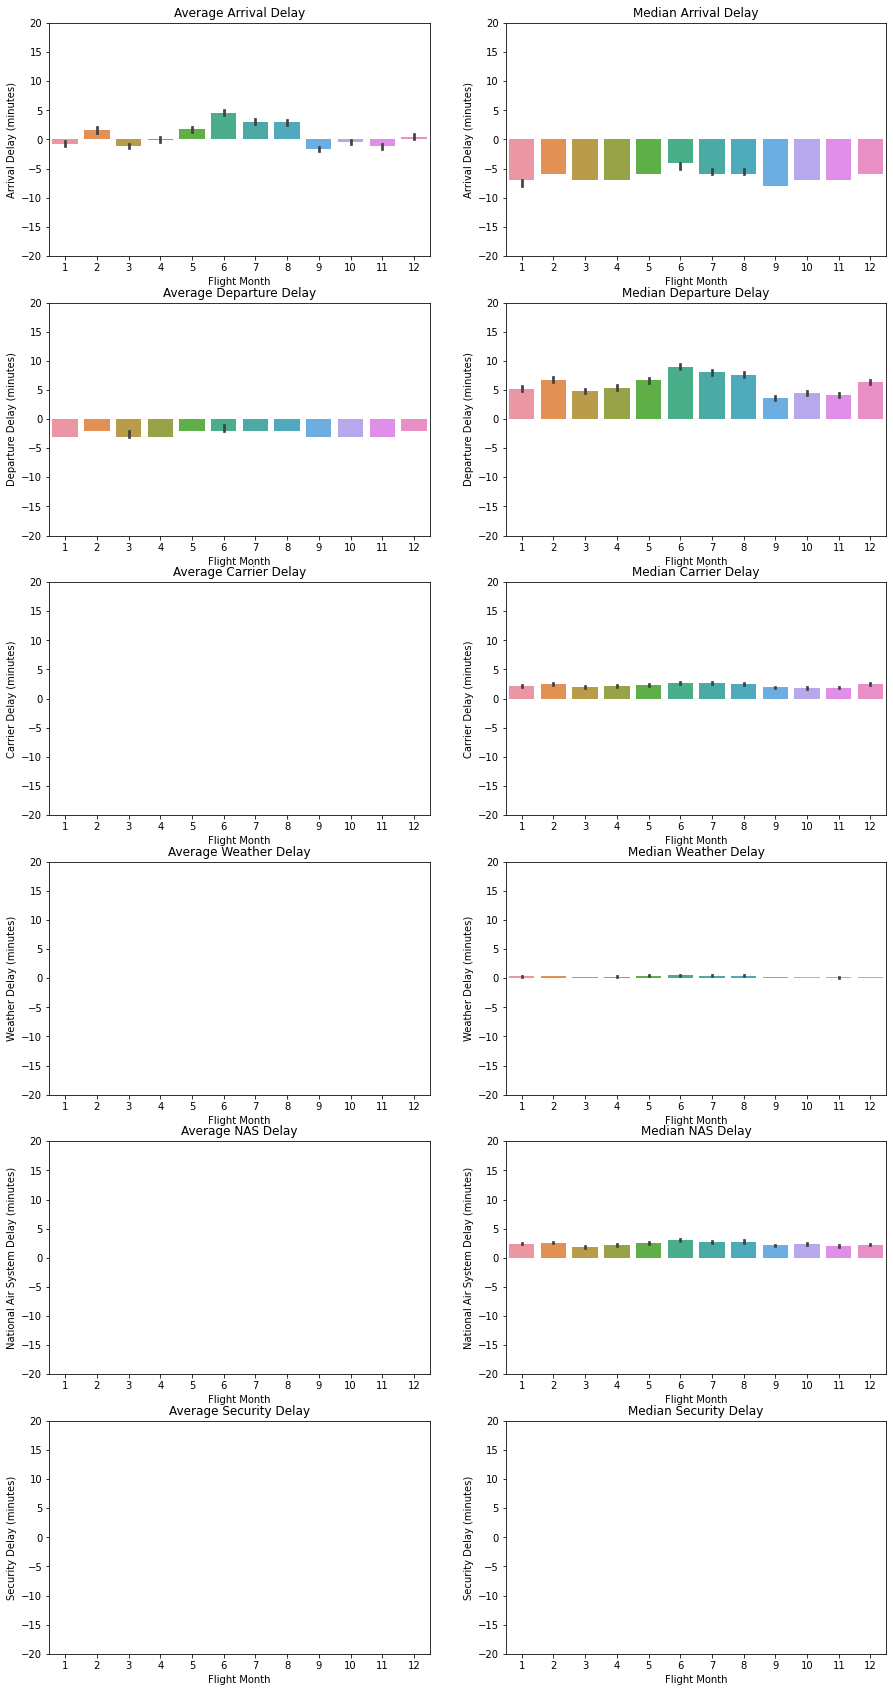

In [20]:
#Make a 6x2 grid of plots, with on each row the average and median delay for each month of arrival delay, departure delay, carrier delay, weather delay, NAS delay, and security delay
fig, ax = plt.subplots(6, 2, figsize=(15, 30))
#fig.suptitle('Average (Left) & Median (Right) Monthly Delay for Arrival and Departure', fontsize=16, fontweight='bold')
sns.barplot(x='Flight Month', y='Arrival Delay (minutes)', data=flights_analysis, ax=ax[0,0])
sns.barplot(x='Flight Month', y='Arrival Delay (minutes)', data=flights_analysis, ax=ax[0,1], estimator=np.median)
sns.barplot(x='Flight Month', y='Departure Delay (minutes)', data=flights_analysis, ax=ax[1,1])
sns.barplot(x='Flight Month', y='Departure Delay (minutes)', data=flights_analysis, ax=ax[1,0], estimator=np.median)
sns.barplot(x='Flight Month', y='Carrier Delay (minutes)', data=flights_analysis, ax=ax[2,1])
sns.barplot(x='Flight Month', y='Carrier Delay (minutes)', data=flights_analysis, ax=ax[2,0], estimator=np.median)
sns.barplot(x='Flight Month', y='Weather Delay (minutes)', data=flights_analysis, ax=ax[3,1])
sns.barplot(x='Flight Month', y='Weather Delay (minutes)', data=flights_analysis, ax=ax[3,0], estimator=np.median)
sns.barplot(x='Flight Month', y='National Air System Delay (minutes)', data=flights_analysis, ax=ax[4,1])
sns.barplot(x='Flight Month', y='National Air System Delay (minutes)', data=flights_analysis, ax=ax[4,0], estimator=np.median)
sns.barplot(x='Flight Month', y='Security Delay (minutes)', data=flights_analysis, ax=ax[5,1])
sns.barplot(x='Flight Month', y='Security Delay (minutes)', data=flights_analysis, ax=ax[5,0], estimator=np.median)

#add title
ax[0,0].set_title('Average Arrival Delay')
ax[0,1].set_title('Median Arrival Delay')
ax[1,0].set_title('Average Departure Delay')
ax[1,1].set_title('Median Departure Delay')
ax[2,0].set_title('Average Carrier Delay')
ax[2,1].set_title('Median Carrier Delay')
ax[3,0].set_title('Average Weather Delay')
ax[3,1].set_title('Median Weather Delay')
ax[4,0].set_title('Average NAS Delay')
ax[4,1].set_title('Median NAS Delay')
ax[5,0].set_title('Average Security Delay')
ax[5,1].set_title('Median Security Delay')

#set y scale
ax[0,1].set(ylim=(-20, 20))
ax[0,0].set(ylim=(-20, 20))
ax[1,1].set(ylim=(-20, 20))
ax[1,0].set(ylim=(-20, 20))
ax[2,1].set(ylim=(-20, 20))
ax[2,0].set(ylim=(-20, 20))
ax[3,1].set(ylim=(-20, 20))
ax[3,0].set(ylim=(-20, 20))
ax[4,1].set(ylim=(-20, 20))
ax[4,0].set(ylim=(-20, 20))
ax[5,1].set(ylim=(-20, 20))
ax[5,0].set(ylim=(-20, 20))
plt.show()


### 1. Carrier Delay
Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays. 

### 2. NAS Delay
Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. Delays that occur after Actual Gate Out are usually attributed to the NAS and are also reported through OPSNET. 

### 3. Weather
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival. 

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [21]:
#Create a new column for the hour of the day for actual departure time and for wheels on time
#flights_sample['Actual Departure Hour'] = flights_sample['Actual Departure Time (local time)'].dt.hour
#flights_sample['Wheels On Hour'] = flights_sample['Wheels On (local time)'].dt.hour
## Added above

# see info for the new columns (QC)
flights_analysis.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 193262 entries, 0 to 199349
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Flight Year                                 193262 non-null  int64         
 1   Flight Month                                193262 non-null  int64         
 2   Flight Day                                  193262 non-null  int64         
 3   Flight Weekday                              193262 non-null  int64         
 4   Marketer - Unique Carrier Code              193262 non-null  object        
 5   Operator - Unique Carrier Code              193262 non-null  object        
 6   Different Marketer & Operator Carrier Code  193262 non-null  int64         
 7   Tail Number                                 193262 non-null  object        
 8   Flight Number                               193262 non-null  int64        

NameError: name 'MaxNLocator' is not defined

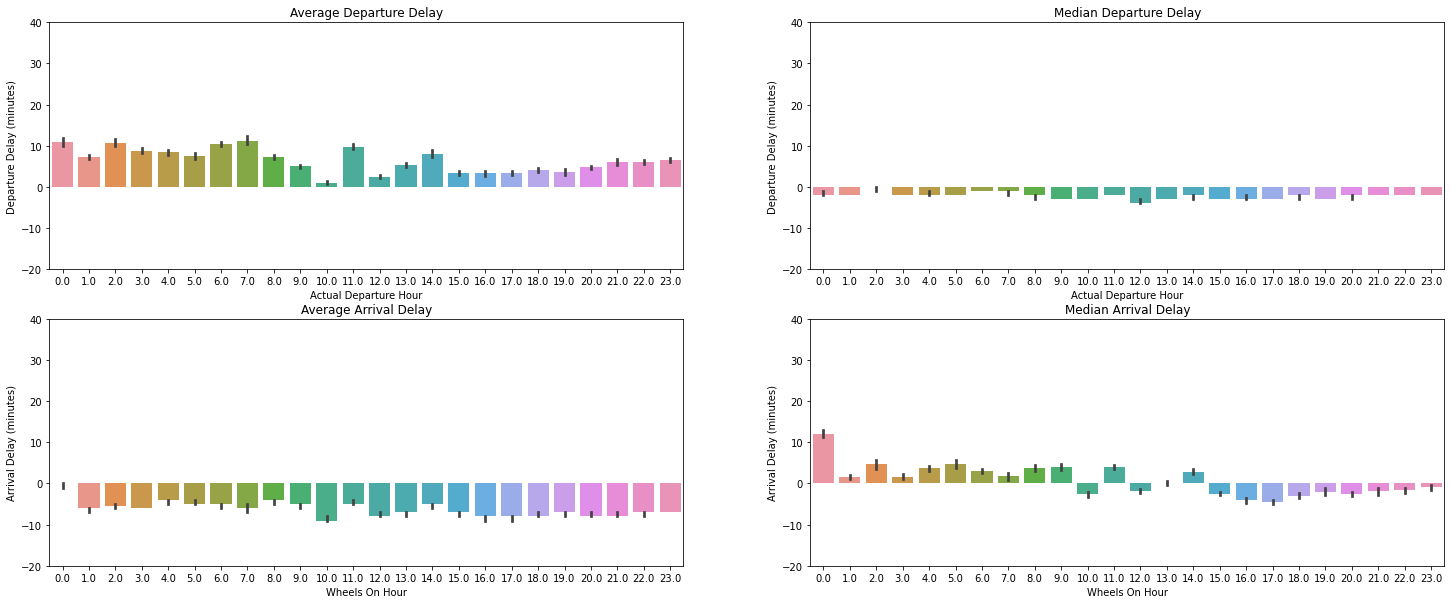

In [22]:
# Plot the average and median departure delay and departure for each hour of the day
fig, ax = plt.subplots(2, 2, figsize=(25, 10))
#fig.suptitle('Average (Left) & Median (Right) Hourly Delay for Departure and Arrival', fontsize=16, fontweight='bold')
sns.barplot(x='Actual Departure Hour', y='Departure Delay (minutes)', data=flights_analysis, ax=ax[0,0])
sns.barplot(x='Actual Departure Hour', y='Departure Delay (minutes)', data=flights_analysis, ax=ax[0,1], estimator=np.median)
sns.barplot(x='Wheels On Hour', y='Arrival Delay (minutes)', data=flights_analysis, ax=ax[1,1])
sns.barplot(x='Wheels On Hour', y='Arrival Delay (minutes)', data=flights_analysis, ax=ax[1,0], estimator=np.median)

#add title
ax[0,0].set_title('Average Departure Delay')
ax[0,1].set_title('Median Departure Delay')
ax[1,0].set_title('Average Arrival Delay')
ax[1,1].set_title('Median Arrival Delay')

#set y scale
ax[0,1].set(ylim=(-20, 40))
ax[0,0].set(ylim=(-20, 40))
ax[1,1].set(ylim=(-20, 40))
ax[1,0].set(ylim=(-20, 40))

#Simplify the X axis so it's more readable
ax[0,0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[0,1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1,0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1,1].xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

What is the difference between average and median in that situation?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [ ]:
# Create a new columns that calculates the difference between the departure delay and arrival delay
#flights_sample['Difference in Delay (Dep - Arr [minutes])'] = flights_sample['Departure Delay (minutes)'] - flights_sample['Arrival Delay (minutes)']
## Added above


In [ ]:
# Count the number that have an arrival delay above 0 and divide by the total number of flights *100 for percentage
print("Percentage of flights with departure delays:",flights_analysis['Arrival Delay (minutes)'].gt(0).sum()/len(flights_analysis)*100)
print("Percentage of flights with arrival delays:",flights_analysis['Departure Delay (minutes)'].gt(0).sum()/len(flights_analysis)*100)
print()
# Calculate the percentage of flights that have a departure delay bigger & smaller than their arrival delay, using 'Difference in Delay (Dep - Arr [minutes])'
print("Percentage of flights with a departure delay bigger than their arrival delay:",flights_analysis['Difference in Delay (Dep - Arr [minutes])'].gt(0).sum()/len(flights_analysis)*100)
print("Percentage of flights with a departure delay smaller than their arrival delay:",flights_analysis['Difference in Delay (Dep - Arr [minutes])'].lt(0).sum()/len(flights_analysis)*100)

In [ ]:
# What is the average percentage of delays that is already created by the departure delay?
flights_analysis[['Departure Delay (minutes)', 'Arrival Delay (minutes)', 'Difference in Delay (Dep - Arr [minutes])']].describe()

In [ ]:
#of the flights that have arrival delays >0, what % have departure delays >0?
arr_delays = flights_analysis[['Arrival Delay (minutes)','Departure Delay (minutes)']]
arr_delays = arr_delays[arr_delays['Arrival Delay (minutes)'] > 0]
arr_delays.shape

In [ ]:
arr_delays['Departure Delay (minutes)'].gt(0).sum()/arr_delays.shape[0] * 100

In [ ]:
# 70% of flights that arrived late left late. This suggests that there is a high correlation between these variables. 

#### **Task 6**: How many states cover 50% of US air traffic? 

In [ ]:
# Create Departure & Arrival State column
flights_analysis['Departure State'] = flights_analysis['Origin Airport (City, State)'].str[-2:]
flights_analysis['Arrival State'] = flights_analysis['Destination Airport (City, State)'].str[-2:]

# Show the States that account for 50% of the total traffic
arrival_traffic = flights_analysis['Arrival State'].value_counts().sort_values(ascending=False)/len(flights_analysis)*100
departure_traffic = flights_analysis['Departure State'].value_counts().sort_values(ascending=False)/len(flights_analysis)*100

#loop through the arrival traffic and add them together until we reach 50%
total_traffic = 0
for i in range(len(arrival_traffic)):
    total_traffic += arrival_traffic[i]
    if total_traffic > 50:
        print("States that account for 50% of the total arrival traffic:",'\n')
        print(arrival_traffic.index[:i+1])
        break

print('\n\n')
        
#loop through the departure traffic and add them together until we reach 50%
total_traffic = 0
for i in range(len(departure_traffic)):
    total_traffic += departure_traffic[i]
    if total_traffic > 50:
        print("States that account for 50% of the total departure traffic:",'\n')
        print(departure_traffic.index[:i+1])
        break
        

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [ ]:
# Airplane speeds
#Create df with relevant columns to calculate airplane speeds
flight_speeds = flights_analysis[['Distance (miles)','Air Time','Departure Delay (minutes)']]
flight_speeds = flight_speeds[flight_speeds['Air Time'] != 0]

In [ ]:
#Create additional column with flight speeds
flight_speeds['flight_speed'] = flight_speeds['Distance (miles)'] / flight_speeds['Air Time']

#Create additional column where departure delay is 'Y' for a late departure (>0) and 'N' for an on-time or early departure.
flight_speeds['Late Departure'] = np.where(flight_speeds['Departure Delay (minutes)'] > 0, 'Y', 'N')

flight_speeds = flight_speeds[['flight_speed','Late Departure']]
flight_speeds.head()

In [ ]:
flight_speeds.groupby("Late Departure")["flight_speed"].mean()

In [ ]:
#Create separate arrarys with speeds for late departures, not late departures
not_late_flights = flight_speeds[flight_speeds['Late Departure'] == 'N']
late_flights = flight_speeds[flight_speeds['Late Departure'] == 'Y']

In [ ]:
not_late_flights.describe()

In [ ]:
late_flights.describe()

In [ ]:
print(type(not_late_flights['flight_speed']), type(late_flights['flight_speed']))

In [ ]:
late_flights = late_flights['flight_speed']
not_late_flights = not_late_flights['flight_speed']

In [ ]:
print(not_late_flights.shape)
print(late_flights.shape)

In [ ]:
not_late_flights_sample = not_late_flights.sample(63280)
print(not_late_flights_sample.shape)
print(late_flights.shape)

In [ ]:
# late_flights_sample = late_flights.sample(5)
# # not_late_flights_sample = not_late_flights.sample(5)

In [ ]:
#use z-test
from statsmodels.stats.weightstats import ztest as ztest
ztest(late_flights, not_late_flights_sample)

In [ ]:
#the p-value is less than 0.05, therefore we have sufficient evidence that planes do fly faster when they are late. 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [ ]:
#Short haul flights: Less than 3 hrs
#Medium Haul flights: 3-6hrs
#long Haul flights: More than 6hrs

# Create a new column 'Flight Haul Type' that calculates the flight duration in hours and assigns 1[short],2[medium],3[long] to the new column depending on the flight duration
flights_sample['Flight Haul Type'] = flights_sample['Air Time'].apply(lambda x: 1 if x < 180 else (2 if x < 360 else 3))

In [ ]:
# visualize each type of haul flights by hour (Actual Departure Hour) in a bar plot
sns.countplot(x='Actual Departure Hour', data=flights_sample[flights_sample['Flight Haul Type'] == 3])
plt.title('Long Haul Flights')
plt.show()

sns.countplot(x='Actual Departure Hour', data=flights_sample[flights_sample['Flight Haul Type'] == 2])
plt.title('Medium Haul Flights')
plt.show()

sns.countplot(x='Actual Departure Hour', data=flights_sample[flights_sample['Flight Haul Type'] == 1])
plt.title('Short Haul Flights')
plt.show()

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [40]:
departing_flights_passengers = pd.read_csv('../../data/raw/departing_flights_passengers.csv')
departing_flights_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20450 entries, 0 to 20449
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   origin                      20450 non-null  object
 1   total_departures            20450 non-null  int64 
 2   total_departing_passengers  20450 non-null  int64 
 3   year                        20450 non-null  int64 
 4   month                       20450 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 799.0+ KB


In [42]:
arriving_flights_passengers = pd.read_csv('../../data/raw/arriving_flights_passengers.csv')
arriving_flights_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20508 entries, 0 to 20507
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   dest                       20508 non-null  object
 1   total_arrivals             20508 non-null  int64 
 2   total_arriving_passengers  20508 non-null  int64 
 3   year                       20508 non-null  int64 
 4   month                      20508 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 801.2+ KB


In [47]:
from matplotlib.pyplot import figure

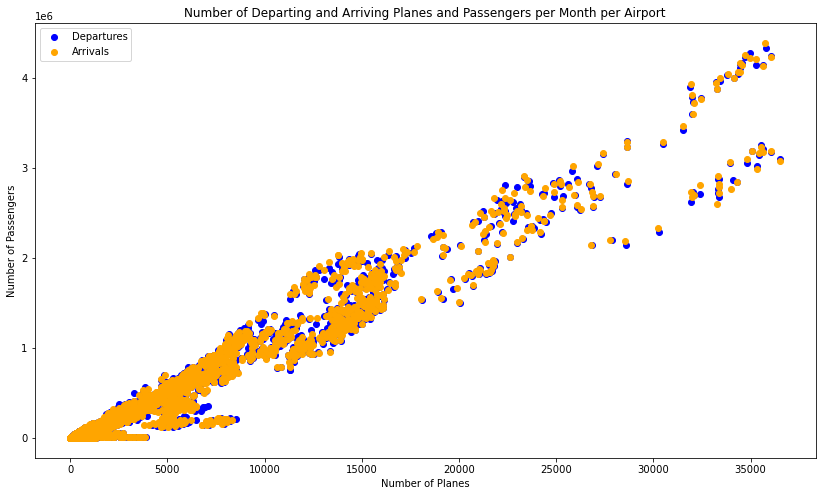

In [171]:
#plot the departing passengers on a scatter plot
fig, ax = plt.subplots()

ax.scatter(departing_flights_passengers['total_departures'], departing_flights_passengers['total_departing_passengers'], color="blue")
ax.scatter(arriving_flights_passengers['total_arrivals'], arriving_flights_passengers['total_arriving_passengers'], color="orange")

ax.set_xlabel("Number of Planes")
ax.set_ylabel("Number of Passengers")
ax.set_title("Number of Departing and Arriving Planes and Passengers per Month per Airport")

ax.legend(['Departures','Arrivals'])
fig.set_size_inches(14, 8)

plt.show()

In [172]:
# Group by airport to see total flights/year
departures_per_airport = departing_flights_passengers.groupby('origin')[['total_departures', 'total_departing_passengers']].sum()
departures_per_airport.head(2)

,total_departures,total_departing_passengers
origin,,
ABE,16942,818268
ABI,5399,169662


In [173]:
arrivals_per_airport = arriving_flights_passengers.groupby('dest')[['total_arrivals', 'total_arriving_passengers']].sum()
arrivals_per_airport.head(2)

,total_arrivals,total_arriving_passengers
dest,,
ABE,16439,811592
ABI,5725,165483


In [174]:
# 10 busiests airports by DEPARTING PLANES
departures_per_airport.sort_values('total_departures', ascending=False).head(10)

,total_departures,total_departing_passengers
origin,,
ATL,797710,93725009
ORD,795470,67406157
DFW,602474,60000472
DEN,568537,62545302
LAX,526502,60947137
CLT,499448,43235411
SEA,391492,43687404
PHX,375237,42434067
IAH,361839,32551633


In [175]:
# 10 busiests airports by DEPARTING PASSENGERS
departures_per_airport.sort_values('total_departing_passengers', ascending=False).head(10)

,total_departures,total_departing_passengers
origin,,
ATL,797710,93725009
ORD,795470,67406157
DEN,568537,62545302
LAX,526502,60947137
DFW,602474,60000472
LAS,340560,45247381
SEA,391492,43687404
CLT,499448,43235411
PHX,375237,42434067


In [176]:
# 10 busiests airports by ARRIVING PLANES
arrivals_per_airport.sort_values('total_arrivals', ascending=False).head(10)

,total_arrivals,total_arriving_passengers
dest,,
ATL,797740,93858938
ORD,795083,67464141
DFW,602053,60035874
DEN,569616,62567223
LAX,524327,60854173
CLT,498753,43349568
SEA,393936,43779746
PHX,373470,42455650
IAH,362640,32618785


In [177]:
# 10 busiests airports by ARRIVING PASSENGERS
arrivals_per_airport.sort_values('total_arriving_passengers', ascending=False).head(10)

,total_arrivals,total_arriving_passengers
dest,,
ATL,797740,93858938
ORD,795083,67464141
DEN,569616,62567223
LAX,524327,60854173
DFW,602053,60035874
LAS,340672,45234402
SEA,393936,43779746
CLT,498753,43349568
PHX,373470,42455650


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [178]:
flights_analysis['Operator - Unique Carrier Code'].describe()


count     193262
unique        28
top           WN
freq       33340
Name: Operator - Unique Carrier Code, dtype: object

In [179]:
flights_analysis.head(3)

,Flight Year,Flight Month,Flight Day,Flight Weekday,Marketer - Unique Carrier Code,Operator - Unique Carrier Code,Different Marketer & Operator Carrier Code,Tail Number,Flight Number,Origin Airport (ID),...,Carrier Delay (minutes),Weather Delay (minutes),National Air System Delay (minutes),Security Delay (minutes),Late Aircraft Delay (minutes),Actual Departure Hour,Wheels On Hour,Difference in Delay (Dep - Arr [minutes]),Departure State,Arrival State
0,2019,4,28,6,AA,AA,0,N914AN,2859,12889,...,0,0,0,0,0,16.0,1.0,10,NV,IL
1,2019,12,21,5,AA,AA,0,N764US,2934,15096,...,0,0,0,0,0,18.0,22.0,21,NY,NC
2,2018,10,22,0,WN,WN,0,N550WN,2320,11540,...,0,0,0,0,0,17.0,21.0,5,TX,TX


In [180]:
delays_by_month_carrier = pd.pivot_table(flights_analysis,index = ["Operator - Unique Carrier Code",'Flight Year','Flight Month'], values = ['Arrival Delay (minutes)'], aggfunc=np.sum)
delays_by_month_carrier.reset_index()

,Operator - Unique Carrier Code,Flight Year,Flight Month,Arrival Delay (minutes)
0,9E,2018,1,-691
1,9E,2018,2,-109
2,9E,2018,3,212
3,9E,2018,4,-417
4,9E,2018,5,-641
...,...,...,...,...
620,ZW,2019,8,-269
621,ZW,2019,9,-515
622,ZW,2019,10,-463
623,ZW,2019,11,-716


In [181]:
carriers_passengers_and_distance = pd.read_csv('../../data/raw/carriers_passengers_and_distance.csv')
carriers_passengers_and_distance.columns = ['total_distance', 'total_passengers', "Operator - Unique Carrier Code",'Flight Year','Flight Month']
carriers_passengers_and_distance.head()

,total_distance,total_passengers,Operator - Unique Carrier Code,Flight Year,Flight Month
0,8190817,768597,9E,2018,1
1,8187698,807794,9E,2018,2
2,9075345,1042517,9E,2018,3
3,9256602,1093683,9E,2018,4
4,9874853,1163129,9E,2018,5


In [182]:
total_fuel_passengers_by_carrier = pd.read_csv('../../data/raw/total_fuel_passengers_by_carrier.csv')
total_fuel_passengers_by_carrier.columns = ['total_gallons_fuel_domestic', "Operator - Unique Carrier Code",'Flight Year','Flight Month']
total_fuel_passengers_by_carrier['total_gallons_fuel_domestic'].value_counts()

0            167
163705922      1
23951656       1
16143998       1
19947115       1
            ... 
30609          1
15343204       1
163091949      1
154407088      1
55214112       1
Name: total_gallons_fuel_domestic, Length: 253, dtype: int64

In [183]:
#Remove all zeroes from table above
total_fuel_passengers_by_carrier = total_fuel_passengers_by_carrier[total_fuel_passengers_by_carrier['total_gallons_fuel_domestic'] != 0]
total_fuel_passengers_by_carrier.describe()

,total_gallons_fuel_domestic,Flight Year,Flight Month
count,2.520000e+02,252.000000,252.000000
mean,7.445406e+07,2018.428571,5.857143
std,7.137560e+07,0.495856,3.202873
min,1.344700e+04,2018.000000,1.000000
25%,1.566742e+07,2018.000000,3.000000
50%,4.461024e+07,2018.000000,6.000000
75%,1.581438e+08,2019.000000,8.000000
max,2.073632e+08,2019.000000,12.000000


In [184]:
#Join tables - 1
fuel_consumption_analysis = pd.merge(delays_by_month_carrier, carriers_passengers_and_distance, 
                                    on = ['Operator - Unique Carrier Code', 'Flight Year', 'Flight Month'], how = 'outer')
fuel_consumption_analysis.describe()

,Flight Year,Flight Month,Arrival Delay (minutes),total_distance,total_passengers
count,651.000000,651.000000,625.000000,6.500000e+02,6.500000e+02
mean,2018.497696,6.479263,251.396800,1.867518e+07,2.452245e+06
std,0.500379,3.460651,1682.720673,2.452644e+07,3.602325e+06
min,2018.000000,1.000000,-7941.000000,1.351590e+05,0.000000e+00
25%,2018.000000,3.000000,-272.000000,3.165294e+06,3.623655e+05
50%,2018.000000,6.000000,72.000000,8.906270e+06,1.075520e+06
75%,2019.000000,9.000000,771.000000,2.482112e+07,2.643495e+06
max,2019.000000,12.000000,9089.000000,9.109776e+07,1.484372e+07


In [185]:
#Join tables - 2
fuel_consumption_analysis = pd.merge(fuel_consumption_analysis, total_fuel_passengers_by_carrier, 
                                    on = ['Operator - Unique Carrier Code', 'Flight Year', 'Flight Month'], how = 'outer')
fuel_consumption_analysis.head(50)

,Operator - Unique Carrier Code,Flight Year,Flight Month,Arrival Delay (minutes),total_distance,total_passengers,total_gallons_fuel_domestic
0,9E,2018,1,-691.0,8190817.0,768597.0,NaN
1,9E,2018,2,-109.0,8187698.0,807794.0,NaN
2,9E,2018,3,212.0,9075345.0,1042517.0,NaN
3,9E,2018,4,-417.0,9256602.0,1093683.0,NaN
4,9E,2018,5,-641.0,9874853.0,1163129.0,NaN
5,9E,2018,6,-170.0,10363042.0,1248049.0,NaN
6,9E,2018,7,-973.0,9883886.0,1178769.0,NaN
7,9E,2018,8,124.0,10248241.0,1213125.0,NaN
8,9E,2018,9,-254.0,9559823.0,1019198.0,NaN
9,9E,2018,10,-692.0,10372247.0,1144901.0,NaN


In [186]:
fuel_consumption_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Operator - Unique Carrier Code  651 non-null    object 
 1   Flight Year                     651 non-null    int64  
 2   Flight Month                    651 non-null    int64  
 3   Arrival Delay (minutes)         625 non-null    float64
 4   total_distance                  650 non-null    float64
 5   total_passengers                650 non-null    float64
 6   total_gallons_fuel_domestic     252 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 40.7+ KB


In [189]:
fuel_consumption_analysis['fuel_consumption_per_passenger_mile'] = fuel_consumption_analysis['total_gallons_fuel_domestic'] / fuel_consumption_analysis['total_passengers'] / fuel_consumption_analysis['total_distance']
fuel_consumption_analysis.head()

,Operator - Unique Carrier Code,Flight Year,Flight Month,Arrival Delay (minutes),total_distance,total_passengers,total_gallons_fuel_domestic,fuel_consumption_per_passenger_mile
0,9E,2018,1,-691.0,8190817.0,768597.0,NaN,NaN
1,9E,2018,2,-109.0,8187698.0,807794.0,NaN,NaN
2,9E,2018,3,212.0,9075345.0,1042517.0,NaN,NaN
3,9E,2018,4,-417.0,9256602.0,1093683.0,NaN,NaN
4,9E,2018,5,-641.0,9874853.0,1163129.0,NaN,NaN


In [190]:
fuel_consumption_analysis.head(50)

,Operator - Unique Carrier Code,Flight Year,Flight Month,Arrival Delay (minutes),total_distance,total_passengers,total_gallons_fuel_domestic,fuel_consumption_per_passenger_mile
0,9E,2018,1,-691.0,8190817.0,768597.0,NaN,NaN
1,9E,2018,2,-109.0,8187698.0,807794.0,NaN,NaN
2,9E,2018,3,212.0,9075345.0,1042517.0,NaN,NaN
3,9E,2018,4,-417.0,9256602.0,1093683.0,NaN,NaN
4,9E,2018,5,-641.0,9874853.0,1163129.0,NaN,NaN
5,9E,2018,6,-170.0,10363042.0,1248049.0,NaN,NaN
6,9E,2018,7,-973.0,9883886.0,1178769.0,NaN,NaN
7,9E,2018,8,124.0,10248241.0,1213125.0,NaN,NaN
8,9E,2018,9,-254.0,9559823.0,1019198.0,NaN,NaN
9,9E,2018,10,-692.0,10372247.0,1144901.0,NaN,NaN


In [168]:
# fuel_consumption_analysis = fuel_consumption_analysis[fuel_consumption_analysis['Arrival Delay (minutes)'] > 0]

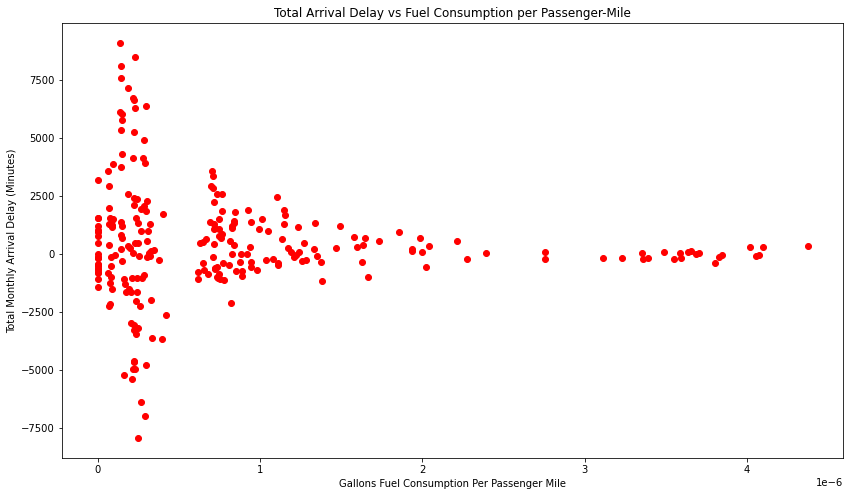

In [169]:
#plot the total arrival delay vs fuel_consumption_per_passenger_mile on scatter plot
fig, ax = plt.subplots()

ax.scatter(fuel_consumption_analysis['fuel_consumption_per_passenger_mile'], fuel_consumption_analysis['Arrival Delay (minutes)'], color="red")

ax.set_xlabel("Gallons Fuel Consumption Per Passenger Mile")
ax.set_ylabel("Total Monthly Arrival Delay (Minutes)")
ax.set_title("Total Arrival Delay vs Fuel Consumption per Passenger-Mile")

fig.set_size_inches(14, 8)

plt.show()